In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
import os
import warnings

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir('D:\\TAXI_all_files\\AGG')

# загрузка аггрегированных значений с 2013 по 2016 гг (по май включительно) и обьединение:
january_2013_aggr = pd.read_csv('january_2013_aggr.csv', index_col='region')
february_2013_aggr = pd.read_csv('february_2013_aggr.csv', index_col='region')
march_2013_aggr = pd.read_csv('march_2013_aggr.csv', index_col='region')
april_2013_aggr = pd.read_csv('april_2013_aggr.csv', index_col='region')
may_2013_aggr = pd.read_csv('may_2013_aggr.csv', index_col='region')
june_2013_aggr = pd.read_csv('june_2013_aggr.csv', index_col='region')
july_2013_aggr = pd.read_csv('july_2013_aggr.csv', index_col='region')
august_2013_aggr = pd.read_csv('august_2013_aggr.csv', index_col='region')
september_2013_aggr = pd.read_csv('september_2013_aggr.csv', index_col='region')
october_2013_aggr = pd.read_csv('october_2013_aggr.csv', index_col='region')
november_2013_aggr = pd.read_csv('november_2013_aggr.csv', index_col='region')
december_2013_aggr = pd.read_csv('december_2013_aggr.csv', index_col='region')

january_2014_aggr = pd.read_csv('january_2014_aggr.csv', index_col='region')
february_2014_aggr = pd.read_csv('february_2014_aggr.csv', index_col='region')
march_2014_aggr = pd.read_csv('march_2014_aggr.csv', index_col='region')
april_2014_aggr = pd.read_csv('april_2014_aggr.csv', index_col='region')
may_2014_aggr = pd.read_csv('may_2014_aggr.csv', index_col='region')
june_2014_aggr = pd.read_csv('june_2014_aggr.csv', index_col='region')
july_2014_aggr = pd.read_csv('july_2014_aggr.csv', index_col='region')
august_2014_aggr = pd.read_csv('august_2014_aggr.csv', index_col='region')
september_2014_aggr = pd.read_csv('september_2014_aggr.csv', index_col='region')
october_2014_aggr = pd.read_csv('october_2014_aggr.csv', index_col='region')
november_2014_aggr = pd.read_csv('november_2014_aggr.csv', index_col='region')
december_2014_aggr = pd.read_csv('december_2014_aggr.csv', index_col='region')

january_2015_aggr = pd.read_csv('january_2015_aggr.csv', index_col='region')
february_2015_aggr = pd.read_csv('february_2015_aggr.csv', index_col='region')
march_2015_aggr = pd.read_csv('march_2015_aggr.csv', index_col='region')
april_2015_aggr = pd.read_csv('april_2015_aggr.csv', index_col='region')
may_2015_aggr = pd.read_csv('may_2015_aggr.csv', index_col='region')
june_2015_aggr = pd.read_csv('june_2015_aggr.csv', index_col='region')
july_2015_aggr = pd.read_csv('july_2015_aggr.csv', index_col='region')
august_2015_aggr = pd.read_csv('august_2015_aggr.csv', index_col='region')
september_2015_aggr = pd.read_csv('september_2015_aggr.csv', index_col='region')
october_2015_aggr = pd.read_csv('october_2015_aggr.csv', index_col='region')
november_2015_aggr = pd.read_csv('november_2015_aggr.csv', index_col='region')
december_2015_aggr = pd.read_csv('december_2015_aggr.csv', index_col='region')

january_2016_aggr = pd.read_csv('january_2016_aggr.csv', index_col='region')
february_2016_aggr = pd.read_csv('february_2016_aggr.csv', index_col='region')
march_2016_aggr = pd.read_csv('march_2016_aggr.csv', index_col='region')
april_2016_aggr = pd.read_csv('april_2016_aggr.csv', index_col='region')
may_2016_aggr = pd.read_csv('may_2016_aggr.csv', index_col='region')
july_2016_aggr = pd.read_csv('july_2016_aggr.csv', index_col='region')

os.chdir('C:\\Users\\rosas\\OneDrive\\Документы\\JUPYTER\\TAXI')

In [3]:
frames = [january_2013_aggr, february_2013_aggr, march_2013_aggr, april_2013_aggr, may_2013_aggr, june_2013_aggr, july_2013_aggr,
         august_2013_aggr, september_2013_aggr, october_2013_aggr, november_2013_aggr, december_2013_aggr, january_2014_aggr, 
         february_2014_aggr, march_2014_aggr, april_2014_aggr, may_2014_aggr, june_2014_aggr, july_2014_aggr,
         august_2014_aggr, september_2014_aggr, october_2014_aggr, november_2014_aggr, december_2014_aggr, january_2015_aggr, 
         february_2015_aggr, march_2015_aggr, april_2015_aggr, may_2015_aggr, june_2015_aggr, july_2015_aggr,
         august_2015_aggr, september_2015_aggr, october_2015_aggr, november_2015_aggr, december_2015_aggr, january_2016_aggr, 
         february_2016_aggr, march_2016_aggr, april_2016_aggr, may_2016_aggr, july_2016_aggr]

In [4]:
result = pd.concat(frames, axis=1)

In [5]:
result

,2013-01-01 00:00:00,2013-01-01 01:00:00,2013-01-01 02:00:00,2013-01-01 03:00:00,2013-01-01 04:00:00,2013-01-01 05:00:00,2013-01-01 06:00:00,2013-01-01 07:00:00,2013-01-01 08:00:00,2013-01-01 09:00:00,...,2016-06-30 14:00:00,2016-06-30 15:00:00,2016-06-30 16:00:00,2016-06-30 17:00:00,2016-06-30 18:00:00,2016-06-30 19:00:00,2016-06-30 20:00:00,2016-06-30 21:00:00,2016-06-30 22:00:00,2016-06-30 23:00:00
region,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Запись данных для 4ой недели работы:
regions_102 = pd.read_csv('regions_102.csv', index_col='region') # берем отобранные нами на 2ой неделе 102 региона
result.loc[regions_102.index].to_csv('result_102.csv') # создаем данные для 4ой недели через маскирование 102 регионами

In [7]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 1 to 2500
Columns: 30646 entries, 2013-01-01 00:00:00 to 2016-06-30 23:00:00
dtypes: float64(30646)
memory usage: 580.9 MB


#### 1. Выбор зоны 'Местонахождение Empire State Building'

In [8]:
reg_1231 = pd.DataFrame(result.loc[1231,: '2016-06-01'])
reg_1231

,1231
2013-01-01 00:00:00,1041.0
2013-01-01 01:00:00,821.0
2013-01-01 02:00:00,700.0
2013-01-01 03:00:00,755.0
2013-01-01 04:00:00,600.0
...,...
2016-05-31 19:00:00,1094.0
2016-05-31 20:00:00,997.0
2016-05-31 21:00:00,1099.0
2016-05-31 22:00:00,874.0


Создание регрессионных признаков для учёта сезонностей и трендов:

Годовую и недельную сезонность будем учитывать за счёт регрессионной компоненты разложений рядов Фурье. 
В качестве оценки параметра К мозьмем среднеквадратичное отклонение MSE



In [9]:
# создание регрессионного признака для годовой сезонности:
mse_list = []
N = 40 
K =100
for number in range(N, K+1):
    s_c_data = reg_1231.copy()
    for i in range(1, number+1):
        s_c_data['s_0'] = np.arange(1, reg_1231.shape[0]+1)
        s_c_data['s_'+str(i)] = np.sin(np.arange(1, reg_1231.shape[0]+1)*2*np.pi*i/8766)
        s_c_data['c_'+str(i)] = np.cos(np.arange(1, reg_1231.shape[0]+1)*2*np.pi*i/8766)
    y = reg_1231[1231]
    X = s_c_data.loc[:, 's_0':]
    model = LinearRegression()
    res = model.fit(X, y)
    mse_list.append(mean_squared_error(reg_1231[1231], res.predict(X)))
    K_opt = np.argmin(mse_list)

reg_1231['1231cf'] = res.predict(X)


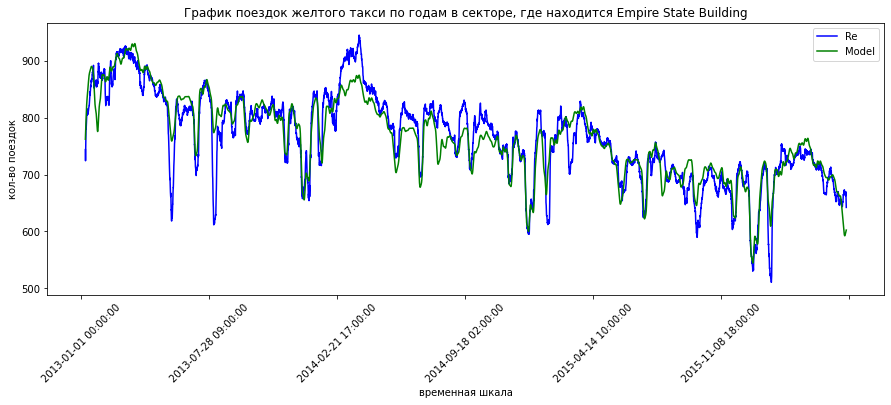

In [10]:
# график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
plt.figure(figsize=(15, 5))

reg_1231.iloc[:29900, 0].rolling(168).mean().plot(color='b', label='Re')
reg_1231.iloc[:29900, 1].rolling(168).mean().plot(color='g', label='Model')
plt.legend()

plt.title('График поездок желтого такси по годам в секторе, где находится Empire State Building')
plt.xlabel('временная шкала')
plt.xticks(rotation=45)
plt.ylabel('кол-во поездок')

plt.show()

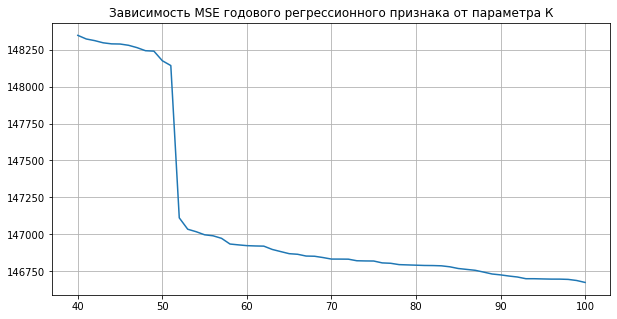

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(range(N, K+1), mse_list)
plt.grid(True)
plt.title('Зависимость MSE годового регрессионного признака от параметра К')

plt.show()

In [12]:
mse_list

[148346.38495909068,
 148321.83779629736,
 148310.6957634759,
 148295.952508417,
 148288.82790389133,
 148287.7183372735,
 148279.19759672642,
 148263.3636002754,
 148242.5960959473,
 148239.56095026032,
 148174.5206839429,
 148142.11518587187,
 147112.03977541256,
 147034.99761443725,
 147018.2562136052,
 146997.34491531728,
 146990.58267567534,
 146973.4785350685,
 146934.92307465745,
 146929.2090443487,
 146924.0246123018,
 146921.8922305689,
 146920.6636502332,
 146898.2619924316,
 146883.81881051164,
 146869.6880772837,
 146865.59539605954,
 146853.66139427252,
 146852.28974563236,
 146843.50042018906,
 146833.1877434449,
 146833.05320710424,
 146832.53010618535,
 146821.8421807936,
 146820.55630061866,
 146820.00780681023,
 146807.3357649711,
 146804.76209792253,
 146795.6629247827,
 146793.74067244865,
 146791.8263133592,
 146789.94116538207,
 146789.34390637497,
 146787.58590684325,
 146780.892635874,
 146769.4048389309,
 146763.24124496497,
 146757.25090265262,
 146745.0723344

Как видим из графика и табличных значений, MSE резко падает в районе K=52  
Для годовой сезонности значение параметра К возьмем равным 52

In [13]:
# Начало обьединения признаков:
reg_all = X.loc[:, :'c_53']

In [14]:
reg_all

,s_0,s_1,c_1,s_2,c_2,s_3,c_3,s_4,c_4,s_5,...,s_49,c_49,s_50,c_50,s_51,c_51,s_52,c_52,s_53,c_53
2013-01-01 00:00:00,1,0.000717,1.000000,0.001434,0.999999,0.002150,0.999998,0.002867,0.999996,0.003584,...,0.035114,0.999383,0.035831,0.999358,0.036547,0.999332,0.037263,0.999305,0.037980,0.999279
2013-01-01 01:00:00,2,0.001434,0.999999,0.002867,0.999996,0.004301,0.999991,0.005734,0.999984,0.007168,...,0.070185,0.997534,0.071615,0.997432,0.073045,0.997329,0.074475,0.997223,0.075904,0.997115
2013-01-01 02:00:00,3,0.002150,0.999998,0.004301,0.999991,0.006451,0.999979,0.008601,0.999963,0.010751,...,0.105170,0.994454,0.107308,0.994226,0.109446,0.993993,0.111583,0.993755,0.113720,0.993513
2013-01-01 03:00:00,4,0.002867,0.999996,0.005734,0.999984,0.008601,0.999963,0.011468,0.999934,0.014335,...,0.140025,0.990148,0.142863,0.989742,0.145700,0.989329,0.148536,0.988907,0.151371,0.988477
2013-01-01 04:00:00,5,0.003584,0.999994,0.007168,0.999974,0.010751,0.999942,0.014335,0.999897,0.017918,...,0.174707,0.984620,0.178234,0.983988,0.181760,0.983343,0.185283,0.982685,0.188803,0.982015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 19:00:00,29922,0.517586,-0.855631,-0.885725,0.464210,0.998123,0.061245,-0.822326,-0.569017,0.409093,...,0.998932,-0.046215,-0.878637,-0.477489,0.504648,0.863325,0.015052,-0.999887,-0.530405,0.847744
2016-05-31 20:00:00,29923,0.516972,-0.856002,-0.885059,0.465480,0.998252,0.059099,-0.823954,-0.566657,0.412360,...,0.996693,-0.081263,-0.895182,-0.445701,0.535863,0.844305,-0.022218,-0.999753,-0.497826,0.867277
2016-05-31 21:00:00,29924,0.516358,-0.856373,-0.884390,0.466748,0.998377,0.056952,-0.825575,-0.564293,0.415622,...,0.993224,-0.116212,-0.910577,-0.413339,0.566362,0.824157,-0.059457,-0.998231,-0.464528,0.885558
2016-05-31 22:00:00,29925,0.515744,-0.856742,-0.883720,0.468015,0.998497,0.054805,-0.827189,-0.561923,0.418879,...,0.988531,-0.151016,-0.924803,-0.380447,0.596104,0.802907,-0.096613,-0.995322,-0.430560,0.902562


In [15]:
# создание регрессионного признака для недельной сезонности:
mse_list = []
N = 30
K = 40
for number in range(N, K+1):
    s_c_data = reg_1231.copy()
    for i in range(1, number+1):
        s_c_data['ss_'+str(i)] = np.sin(np.arange(1, reg_1231.shape[0]+1)*2*np.pi*i/168)
        s_c_data['cc_'+str(i)] = np.cos(np.arange(1, reg_1231.shape[0]+1)*2*np.pi*i/168)
    y = reg_1231[1231]
    X = s_c_data.loc[:, 'ss_1':]
    model = LinearRegression()
    res = model.fit(X, y)
    mse_list.append(mean_squared_error(reg_1231[1231], res.predict(X)))
    K_opt = np.argmin(mse_list)

reg_1231['1231cf'] = res.predict(X) 

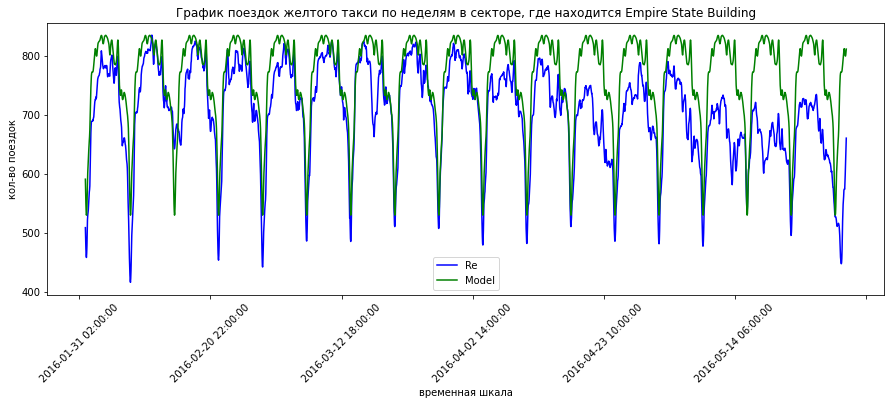

In [16]:
# график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
plt.figure(figsize=(15, 5))

reg_1231.iloc[27000:, 0].rolling(24).mean().plot(color='b', label='Re')
reg_1231.iloc[27000:, 1].rolling(24).mean().plot(color='g', label='Model')
plt.legend()

plt.title('График поездок желтого такси по неделям в секторе, где находится Empire State Building')
plt.xlabel('временная шкала')
plt.xticks(rotation=45)
plt.ylabel('кол-во поездок')


plt.show()

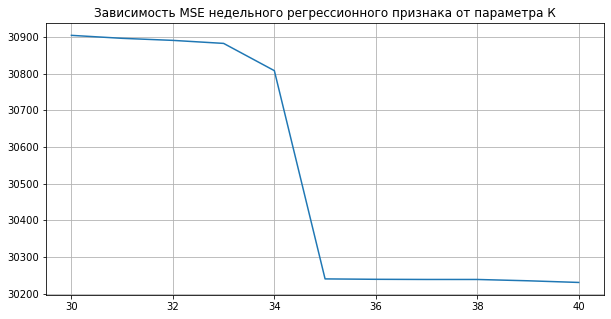

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(range(N, K+1), mse_list)
plt.grid(True)
plt.title('Зависимость MSE недельного регрессионного признака от параметра К')

plt.show()

Как видим из графика и табличных значений, MSE резко падает в районе K=35  
Для недельной сезонности значение параметра К возьмем равным 36

In [18]:
# Обьединенные регрессионные признаки по недели и году:
frames1 =[reg_all, X.loc[:, :'cc_36']]
reg_all = pd.concat(frames1, axis=1)

In [19]:
reg_all.head()

,s_0,s_1,c_1,s_2,c_2,s_3,c_3,s_4,c_4,s_5,...,ss_32,cc_32,ss_33,cc_33,ss_34,cc_34,ss_35,cc_35,ss_36,cc_36
2013-01-01 00:00:00,1,0.000717,1.000000,0.001434,0.999999,0.002150,0.999998,0.002867,0.999996,0.003584,...,0.930874,0.365341,0.943883,0.330279,0.955573,0.294755,0.965926,0.258819,0.974928,0.222521
2013-01-01 01:00:00,2,0.001434,0.999999,0.002867,0.999996,0.004301,0.999991,0.005734,0.999984,0.007168,...,0.680173,-0.733052,0.623490,-0.781831,0.563320,-0.826239,0.500000,-0.866025,0.433884,-0.900969
2013-01-01 02:00:00,3,0.002150,0.999998,0.004301,0.999991,0.006451,0.999979,0.008601,0.999963,0.010751,...,-0.433884,-0.900969,-0.532032,-0.846724,-0.623490,-0.781831,-0.707107,-0.707107,-0.781831,-0.623490
2013-01-01 03:00:00,4,0.002867,0.999996,0.005734,0.999984,0.008601,0.999963,0.011468,0.999934,0.014335,...,-0.997204,0.074730,-0.974928,0.222521,-0.930874,0.365341,-0.866025,0.500000,-0.781831,0.623490
2013-01-01 04:00:00,5,0.003584,0.999994,0.007168,0.999974,0.010751,0.999942,0.014335,0.999897,0.017918,...,-0.294755,0.955573,-0.111964,0.993712,0.074730,0.997204,0.258819,0.965926,0.433884,0.900969


#### 2. Построим модель линейной регресии по полученному набору признаков и оценим ее качество

In [20]:
# Построим модель линейной регресии по полученному набору признаков и оценим ее качество
model = LinearRegression()
res = model.fit(reg_all, y)
y_pred = res.predict(reg_all)
mean_squared_error(reg_1231[1231], y_pred)

24364.55147553643

In [21]:
# Для прикола попробуем LASSO:
model1 = Lasso(alpha=0.001)
res1 = model1.fit(reg_all, y)
y_pred1 = res1.predict(reg_all)
mean_squared_error(reg_1231[1231], y_pred1)

# Как видим отличий практически нет, - что с L1, что без него т.е я не смог добиться лучшего качества на LASSO (пробовал разные alpha)

24364.55183648399

In [22]:
# Посмотрим на остатки регрессии:
comparison = pd.DataFrame({'Actual':y, 'Predicted':y_pred, 'dif':y-y_pred})
comparison.head(25)

,Actual,Predicted,dif
2013-01-01 00:00:00,1041.0,146.880956,894.119044
2013-01-01 01:00:00,821.0,67.986461,753.013539
2013-01-01 02:00:00,700.0,42.477251,657.522749
2013-01-01 03:00:00,755.0,70.005100,684.994900
2013-01-01 04:00:00,600.0,200.638336,399.361664
2013-01-01 05:00:00,334.0,457.620713,-123.620713
2013-01-01 06:00:00,239.0,758.501792,-519.501792
2013-01-01 07:00:00,220.0,964.483581,-744.483581
2013-01-01 08:00:00,191.0,1021.880654,-830.880654
2013-01-01 09:00:00,261.0,1015.963408,-754.963408


In [23]:
comparison.tail(25)

,Actual,Predicted,dif
2016-05-30 23:00:00,359.0,721.064043,-362.064043
2016-05-31 00:00:00,217.0,464.518009,-247.518009
2016-05-31 01:00:00,131.0,230.216030,-99.216030
2016-05-31 02:00:00,62.0,70.247786,-8.247786
2016-05-31 03:00:00,56.0,-7.560657,63.560657
2016-05-31 04:00:00,69.0,-32.024754,101.024754
2016-05-31 05:00:00,121.0,-3.492840,124.492840
2016-05-31 06:00:00,305.0,128.103349,176.896651
2016-05-31 07:00:00,515.0,386.007547,128.992453
2016-05-31 08:00:00,782.0,687.769334,94.230666


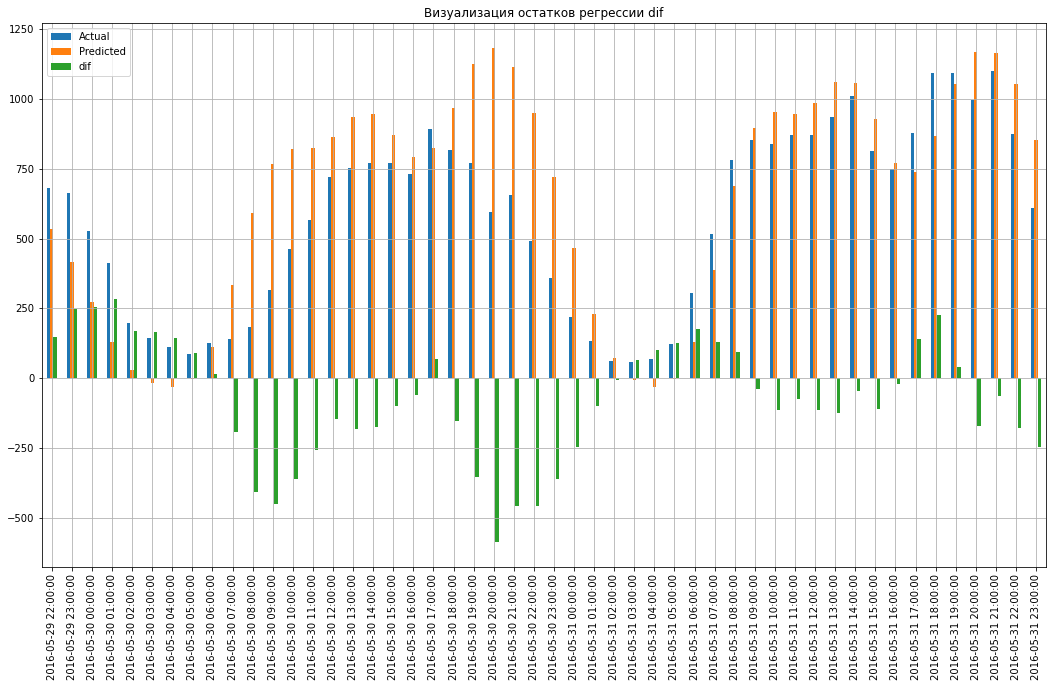

In [24]:
comparison.tail(50).plot(kind='bar',figsize=(18,10))
plt.title('Визуализация остатков регрессии dif')
plt.grid(True)

plt.show()

#### 3. Подбор значений гиперпараметров ARIMA

STL разложение временного ряда "Остатки (разность между предикторами регрессоров и значениями)"


<Figure size 1080x720 with 0 Axes>

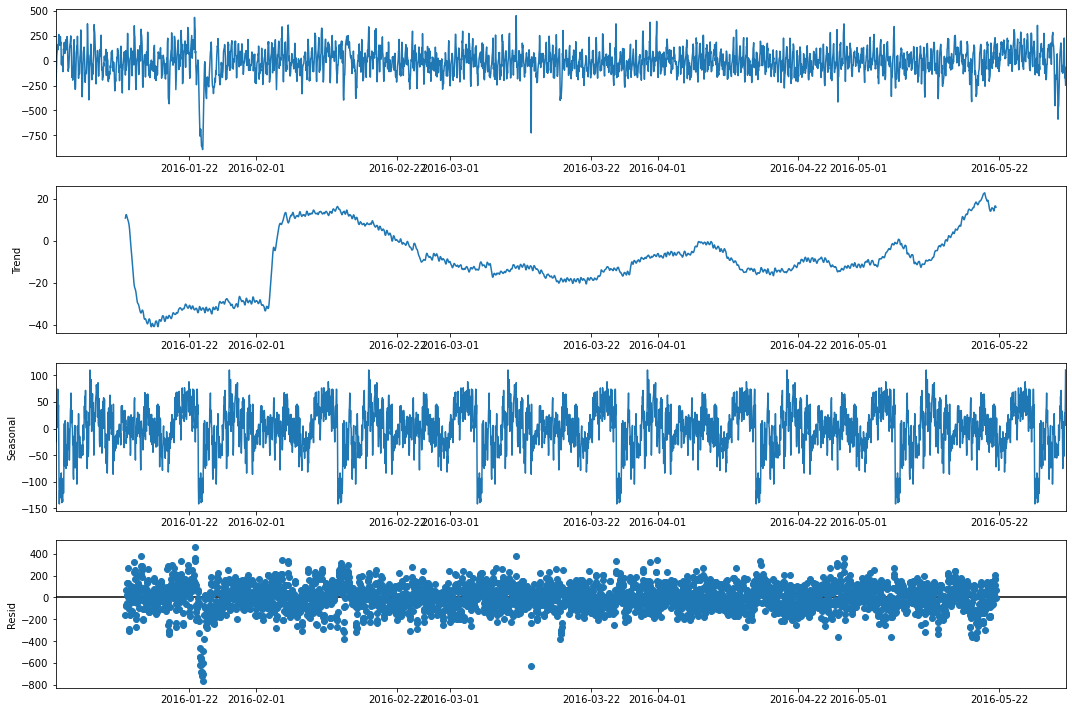

Критерий Дики-Фуллера: p=0.000000


In [25]:
# Сделаем АРИМУ по остаткам (разности между предикторами регрессоров и значениями):
# Из-за ограниченности вычислительных ресурсов, - расчет производим, начиная с даты '2016-01-01'

compar = pd.DataFrame(comparison['dif'])
compar.index = pd.to_datetime(compar.index)
compar = compar['2016-01-01' :]
reg_all = reg_all['2016-01-01' : ]
print ('STL разложение временного ряда "Остатки (разность между предикторами регрессоров и значениями)"')
plt.figure(figsize(15,10))

sm.tsa.seasonal_decompose(compar[24:], period=500).plot()
plt.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(compar)[1])


Критерий Дики-Фуллера отвергает гипотезу нестационарности, НО линия тренда все равно не дает какой то однозначности. 

<Figure size 1080x720 with 0 Axes>

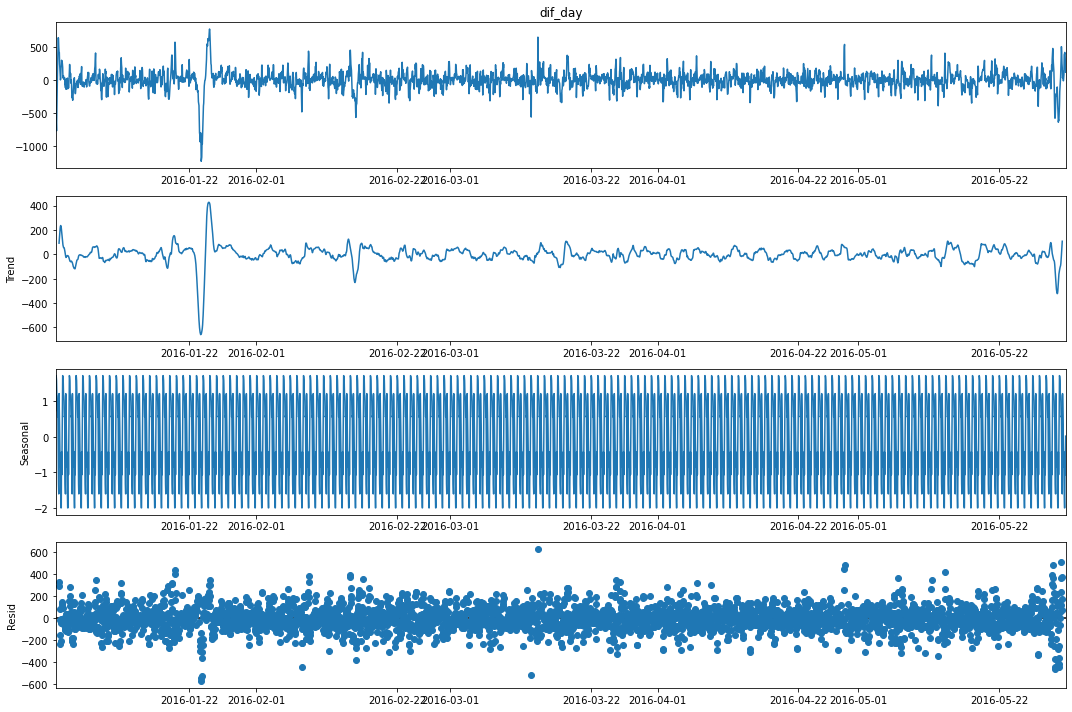

Критерий Дики-Фуллера: p=0.000000


In [26]:
# Попробуем сезонное (суточное) дифференцирование; сделаем на продифференцированном ряде STL-декомпозицию и проверим стационарность:
compar['dif_day'] = compar['dif'] - compar['dif'].shift(24)

plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(compar['dif_day'][24:]).plot()
pylab.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(compar['dif_day'][24:])[1])

In [27]:
# Визуально ряд выглядит лучше — тренда больше нет.

#### 4. Постороение модели

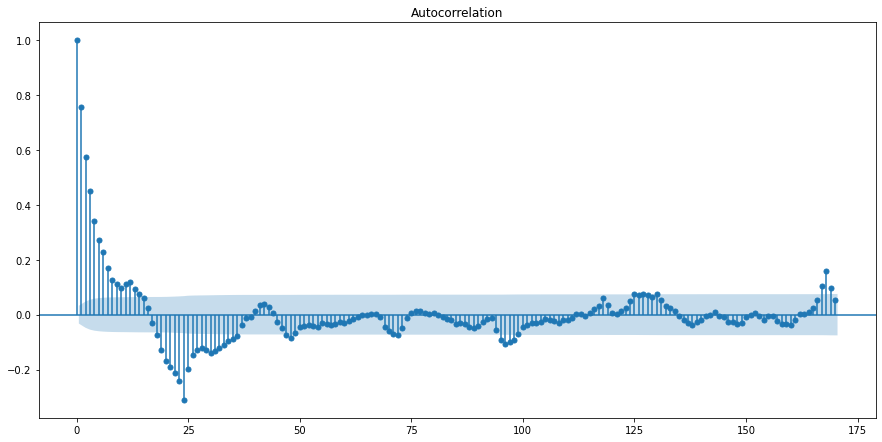

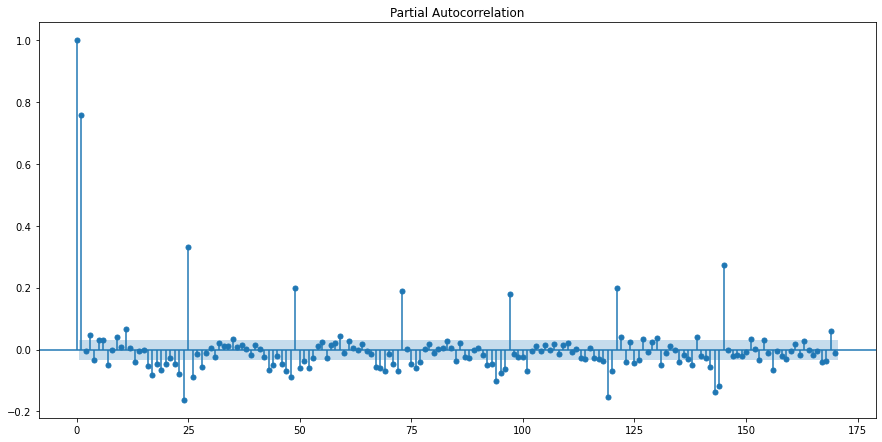

In [28]:

# Посмотрим на ACF и PACF полученного ряда:

plt.figure(figsize(15,16))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(compar['dif_day'][24:], lags=170, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(compar['dif_day'][24:], lags=170, ax=ax)
plt.show()

Глядя на наши графики, Выбираем начальные приближения: Q=1, q=4, P=6, p=1   
(в том числе и исходя из разумной достаточности и ограничений вычислительных ресурсов)

In [29]:
ps = range(0, 2)
d=0
qs = range(0, 5)
Ps = range(0, 7)
D=1
Qs = range(0, 2)

In [30]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

140

In [31]:
# results = []
# best_aic = float("inf")
# warnings.filterwarnings('ignore')

# for param in parameters_list:
#     #try except нужен, потому что на некоторых наборах параметров модель не обучается
#     try:
#         model=sm.tsa.statespace.SARIMAX(compar['dif'],  order=(param[0], d, param[1]), 
#                                         seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1, maxiter=10)
#     #выводим параметры, на которых модель не обучается и переходим к следующему набору
#     except ValueError:
#         print('wrong parameters:', param)
#         continue
#     aic = model.aic
#     print ('parameters:{} have aic value {}'.format(param, aic))
#     #сохраняем лучшую модель, aic, параметры
#     if aic < best_aic:
#         best_model = model
#         best_aic = aic
#         best_param = param
#     results.append([param, model.aic])
    
# warnings.filterwarnings('default')
# # exog=reg_all решил не использовать, система виснет из-за ограниченности системных ресурсов. 
# # Да и сами регрессоры уже учтены в предикторах, на основе ктр и анализируем остатки 

Рассчет закоментирован,т.к. занимает более 2х часов. Вывожу оптимальные данные:

In [32]:
best_aic = 41309.123862929955 

In [33]:
best_param = (1, 3, 6, 0)

#### 5. ЛУЧШАЯ МОДЕЛЬ:

In [34]:
# Отдельно рассчитаем модель на основе наименьшего информационного критерия АКАИКЕ:
param = (1, 3, 6, 0)
model=sm.tsa.statespace.SARIMAX(compar['dif'],  order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1, maxiter=10)

C:\Users\rosas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\rosas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\rosas\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 dif   No. Observations:                 3648
Model:             SARIMAX(1, 0, 3)x(6, 1, [], 24)   Log Likelihood              -20643.562
Date:                             Sat, 02 Jan 2021   AIC                          41309.124
Time:                                     01:25:10   BIC                          41377.273
Sample:                                 01-01-2016   HQIC                         41333.403
                                      - 05-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8774      0.017     50.865      0.000       0.844       0.911
ma.L1         -0.0745      

Как видим, по Q-критерию Льюнга-Бокса автокоррелированность остатков К СОЖАЛЕНИЮ не ушла,   
это говорит о существовании структуры в остатках, а не только "белого шума". 

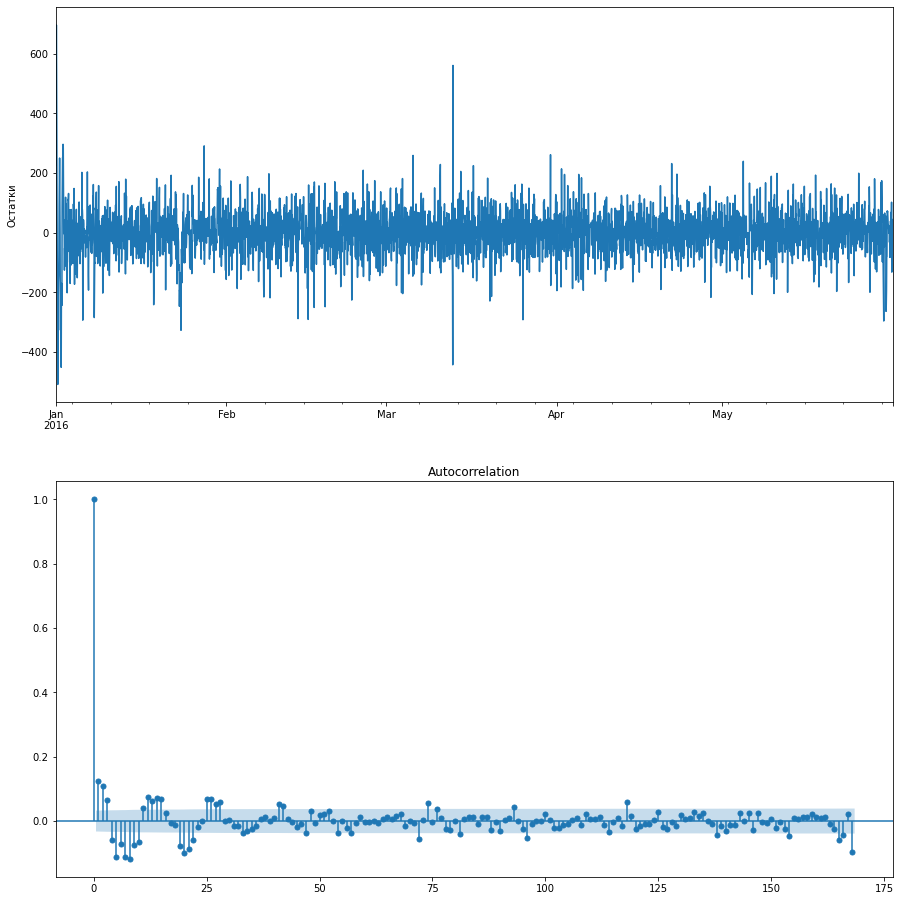

Критерий Стьюдента: p=0.849492
Критерий Дики-Фуллера: p=0.000000


In [36]:
# Посмотрим на остатки более внимательно:

plt.figure(figsize(15,16))

plt.subplot(211)
model.resid.plot()
plt.ylabel('Остатки')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=168, ax=ax)
plt.show()


print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(model.resid, 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(model.resid)[1])

Как видим, остатки несмещены (подтверждается критерием Стьюдента)

##### 6. Проанализируем качество построенной модели

In [37]:
comparison.index = pd.to_datetime(comparison.index)
comparison_part = comparison.loc['2016-01-01' :, 'Actual':'Predicted']

In [38]:
# Соединим предсказательные части по регрессионному анализу и ARIMA:
comparison_part['all_predict'] = comparison_part['Predicted'] + model.fittedvalues

In [39]:
comparison_part

,Actual,Predicted,all_predict
2016-01-01 00:00:00,938.0,710.828685,710.828685
2016-01-01 01:00:00,830.0,484.912500,491.667330
2016-01-01 02:00:00,739.0,230.783168,246.037597
2016-01-01 03:00:00,771.0,48.126576,74.699073
2016-01-01 04:00:00,560.0,-28.169288,13.472727
...,...,...,...
2016-05-31 19:00:00,1094.0,1053.745263,1225.843159
2016-05-31 20:00:00,997.0,1169.542660,1021.629028
2016-05-31 21:00:00,1099.0,1164.322721,1054.414602
2016-05-31 22:00:00,874.0,1052.994496,962.489840


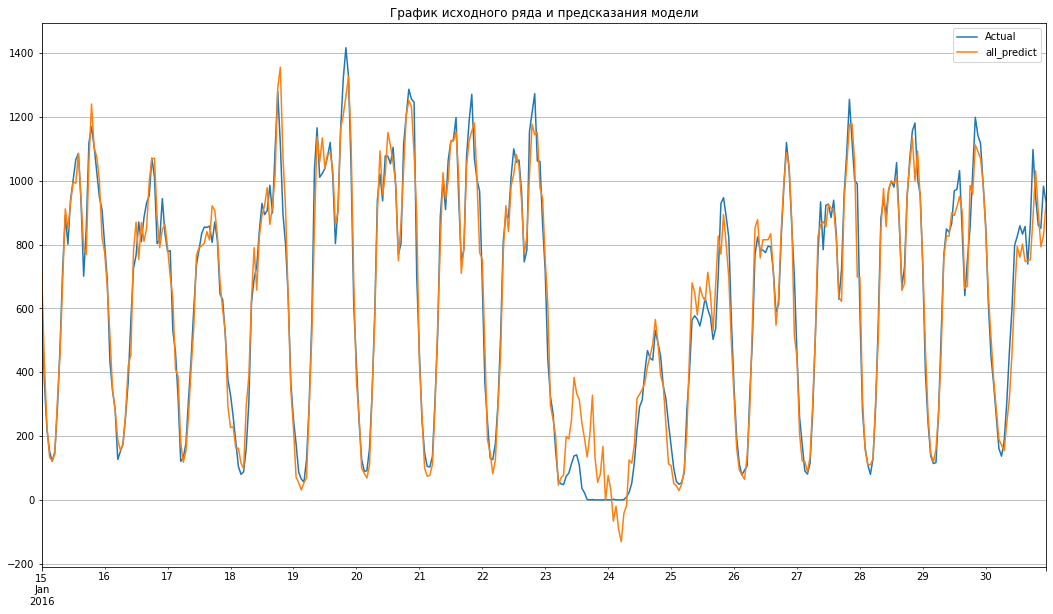

In [40]:
comparison_part.loc['2016-01-15' : '2016-01-30',['Actual', 'all_predict']].plot(figsize=(18,10))
plt.title('График исходного ряда и предсказания модели')
plt.grid(True)

plt.show()

Посмотрим на MSE всей модели и регрессии:

In [41]:
mean_squared_error(comparison_part.Actual, comparison_part.all_predict)

5562.870895691346

In [42]:
mean_squared_error(comparison_part.Actual, comparison_part.Predicted)

18694.610494122368

#### 6. Анализ качества построенной модели.

Модель ведет себя более именее адекватно. Было бы интересно использовать (как например в https://facebook.github.io/prophet/) карту национальных праздников для регрессионных признаков. Так же было бы интересно в качестве регрессионных признаков попробовать прогноз погоды на предстоящий день.(температура, облачность, осадки). Но это выходит за рамки данной работы.  
В нектр из дней, когда были погодные аномалии, прогноз естественно отличается от реальности. Такие дни нужно рассматривать как выбросы и ,как вариант, сглаживать соседними значениями.  
https://en.wikipedia.org/wiki/January_2016_United_States_blizzard  
https://www.youtube.com/watch?v=FQEW3xLOa9M